# AIPI 590 - XAI | Explainable Techniques II
### Exploratory analysis of a dataset to determine the amount of correlation between features
### Mariam Khan

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mkhan13/XAI/blob/explainable_ml/explainable_techniques_II.ipynb)

In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay

In [2]:
repo_name = "XAI"
branch_name = "explainable_ml"
git_path = "https://github.com/Mkhan13/XAI.git"

# If repo already exists, remove it first to avoid conflicts
if os.path.exists(repo_name):
    !rm -rf {repo_name}

# Clone the branch
!git clone -b {branch_name} {git_path}

# Path to data folder
data_dir = os.path.join(repo_name, "data", "explainable_ml_II")

# Verify files exist
print("Files in data folder:", os.listdir(data_dir))

Cloning into 'XAI'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 93 (delta 20), reused 11 (delta 11), pack-reused 61 (from 1)
Receiving objects: 100% (93/93), 1.22 MiB | 15.42 MiB/s, done.
Resolving deltas: 100% (35/35), done.
Files in data folder: ['zoo.csv', 'class.csv']


In [3]:
# Load CSV
zoo_path = os.path.join(data_dir, "zoo.csv")
class_path = os.path.join(data_dir, "class.csv")

zoo_df = pd.read_csv(zoo_path)
class_df = pd.read_csv(class_path)

# Merge on class_type
zoo_df = zoo_df.merge(class_df, how="left", left_on="class_type", right_on="Class_Number")

# Drop the redundant numeric columns
zoo_df = zoo_df.drop(columns=["class_type", "Class_Number", "Number_Of_Animal_Species_In_Class", "Animal_Names"])

# Rename for clarity
zoo_df = zoo_df.rename(columns={"Class_Type": "class_type"})

# Show dataset
print(zoo_df.head())

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

  class_type  
0     Mammal  
1     Mammal  
2       Fish  
3     Ma

### RandomForest Model

In [4]:
# Prepare features and target
X = zoo_df.drop(columns=["animal_name", "class_type"])
y = zoo_df["class_type"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify to avoid class imbalance

In [5]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### **PDP Plot**

/usr/local/lib/python3.12/dist-packages/sklearn/inspection/_plot/partial_dependence.py:976: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


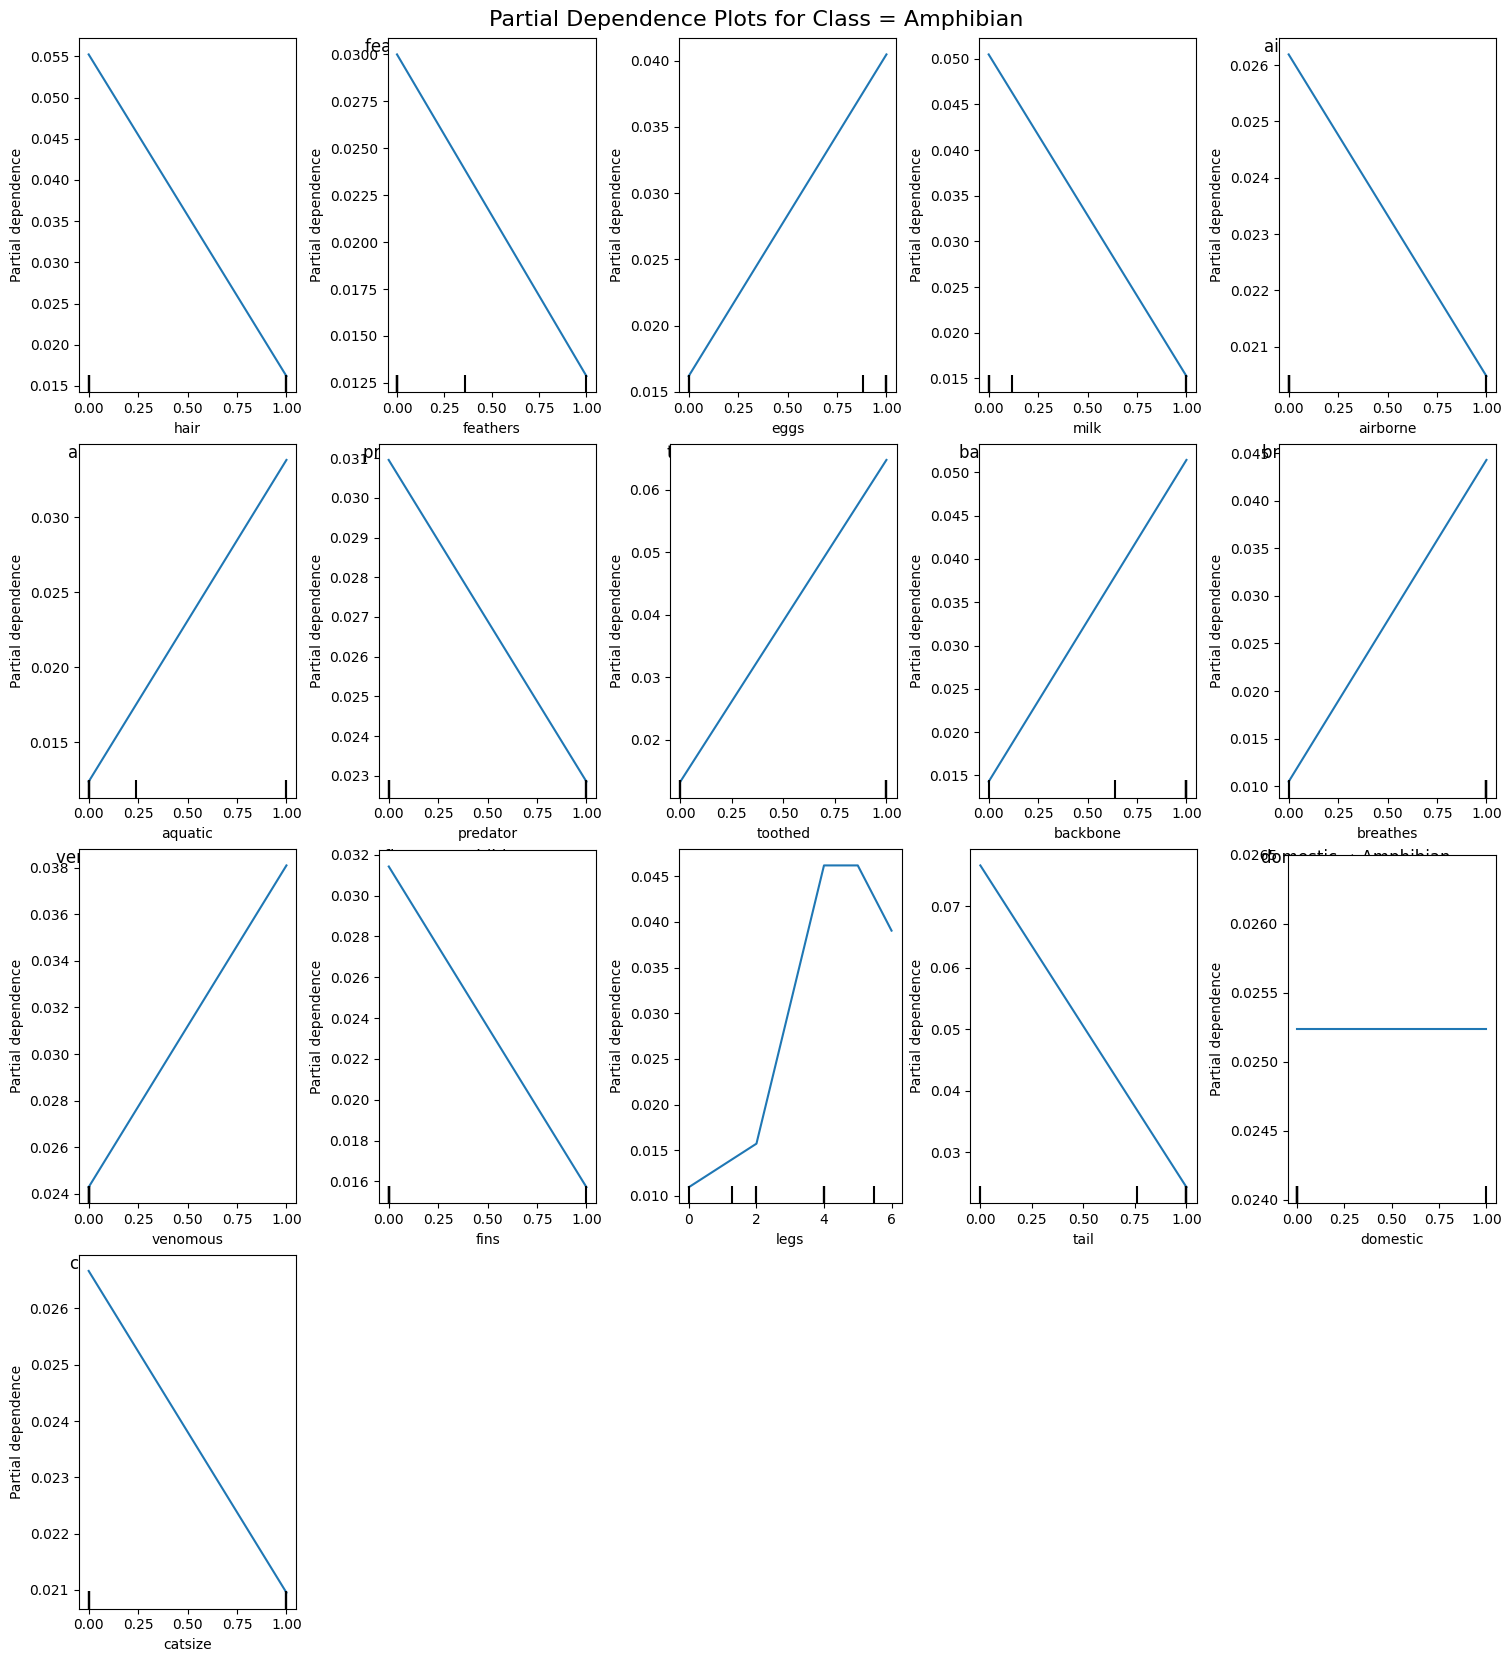

/usr/local/lib/python3.12/dist-packages/sklearn/inspection/_plot/partial_dependence.py:976: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


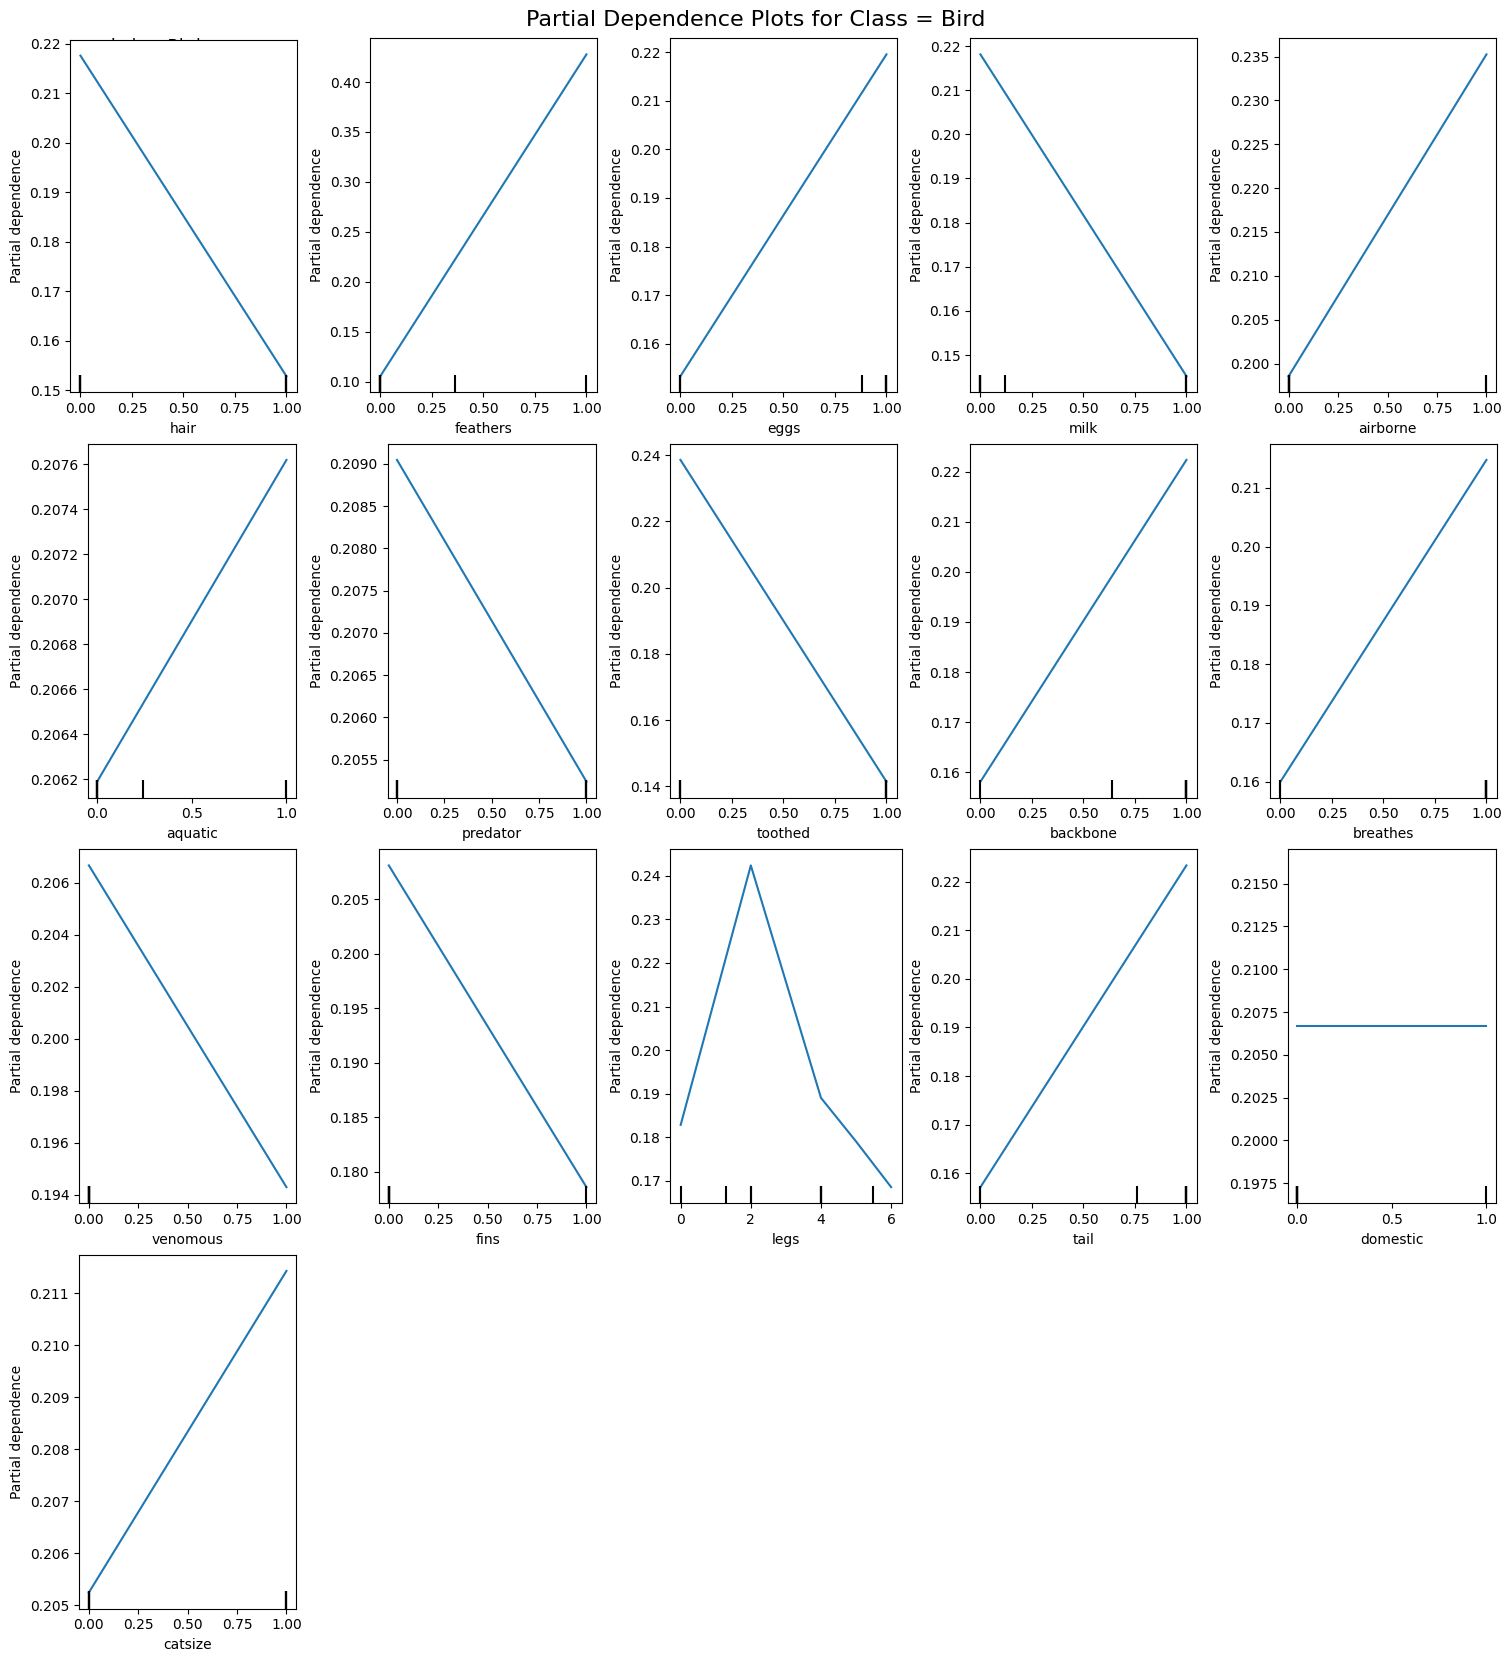

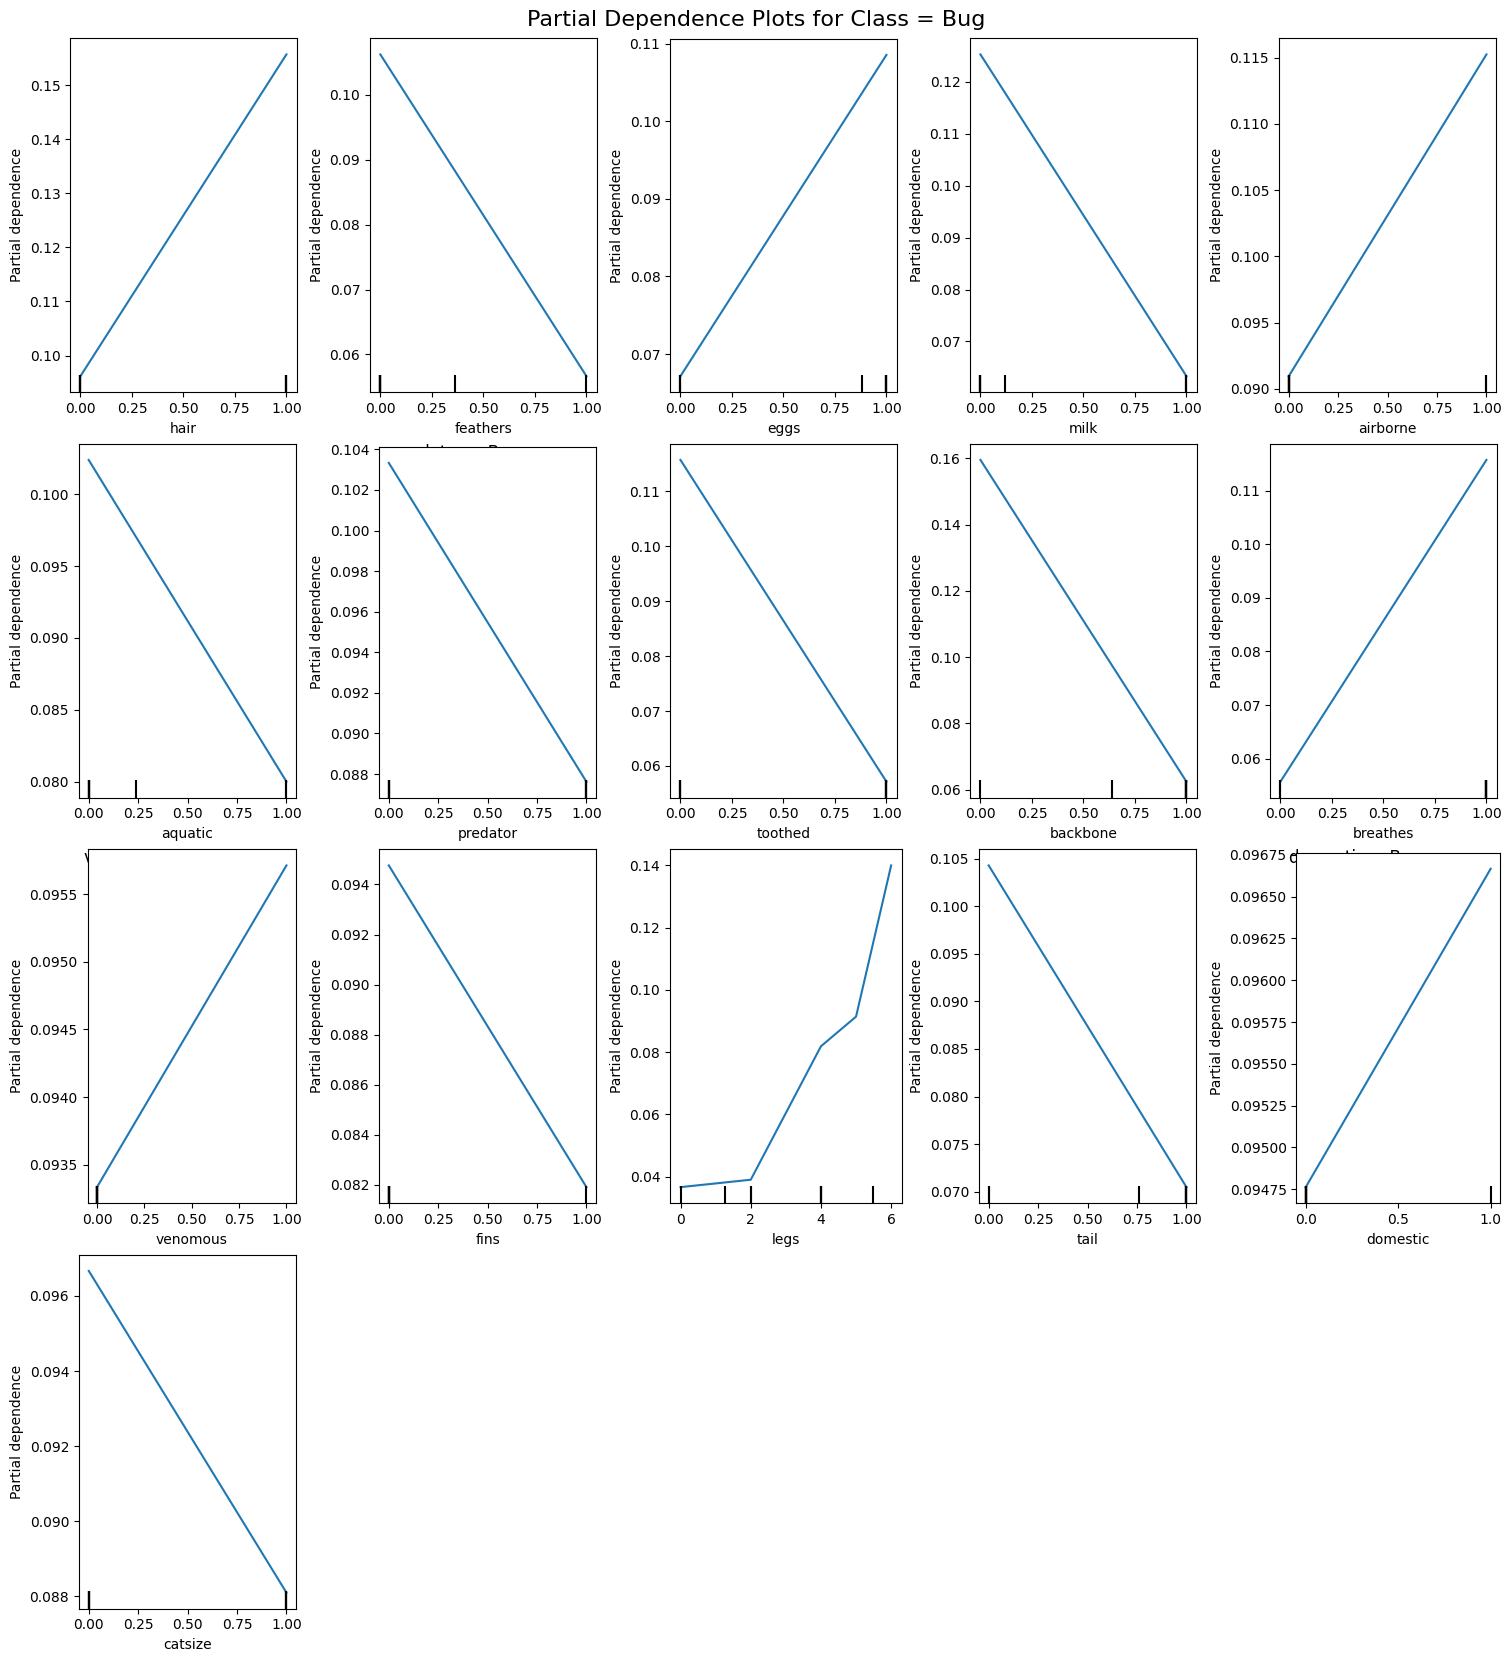

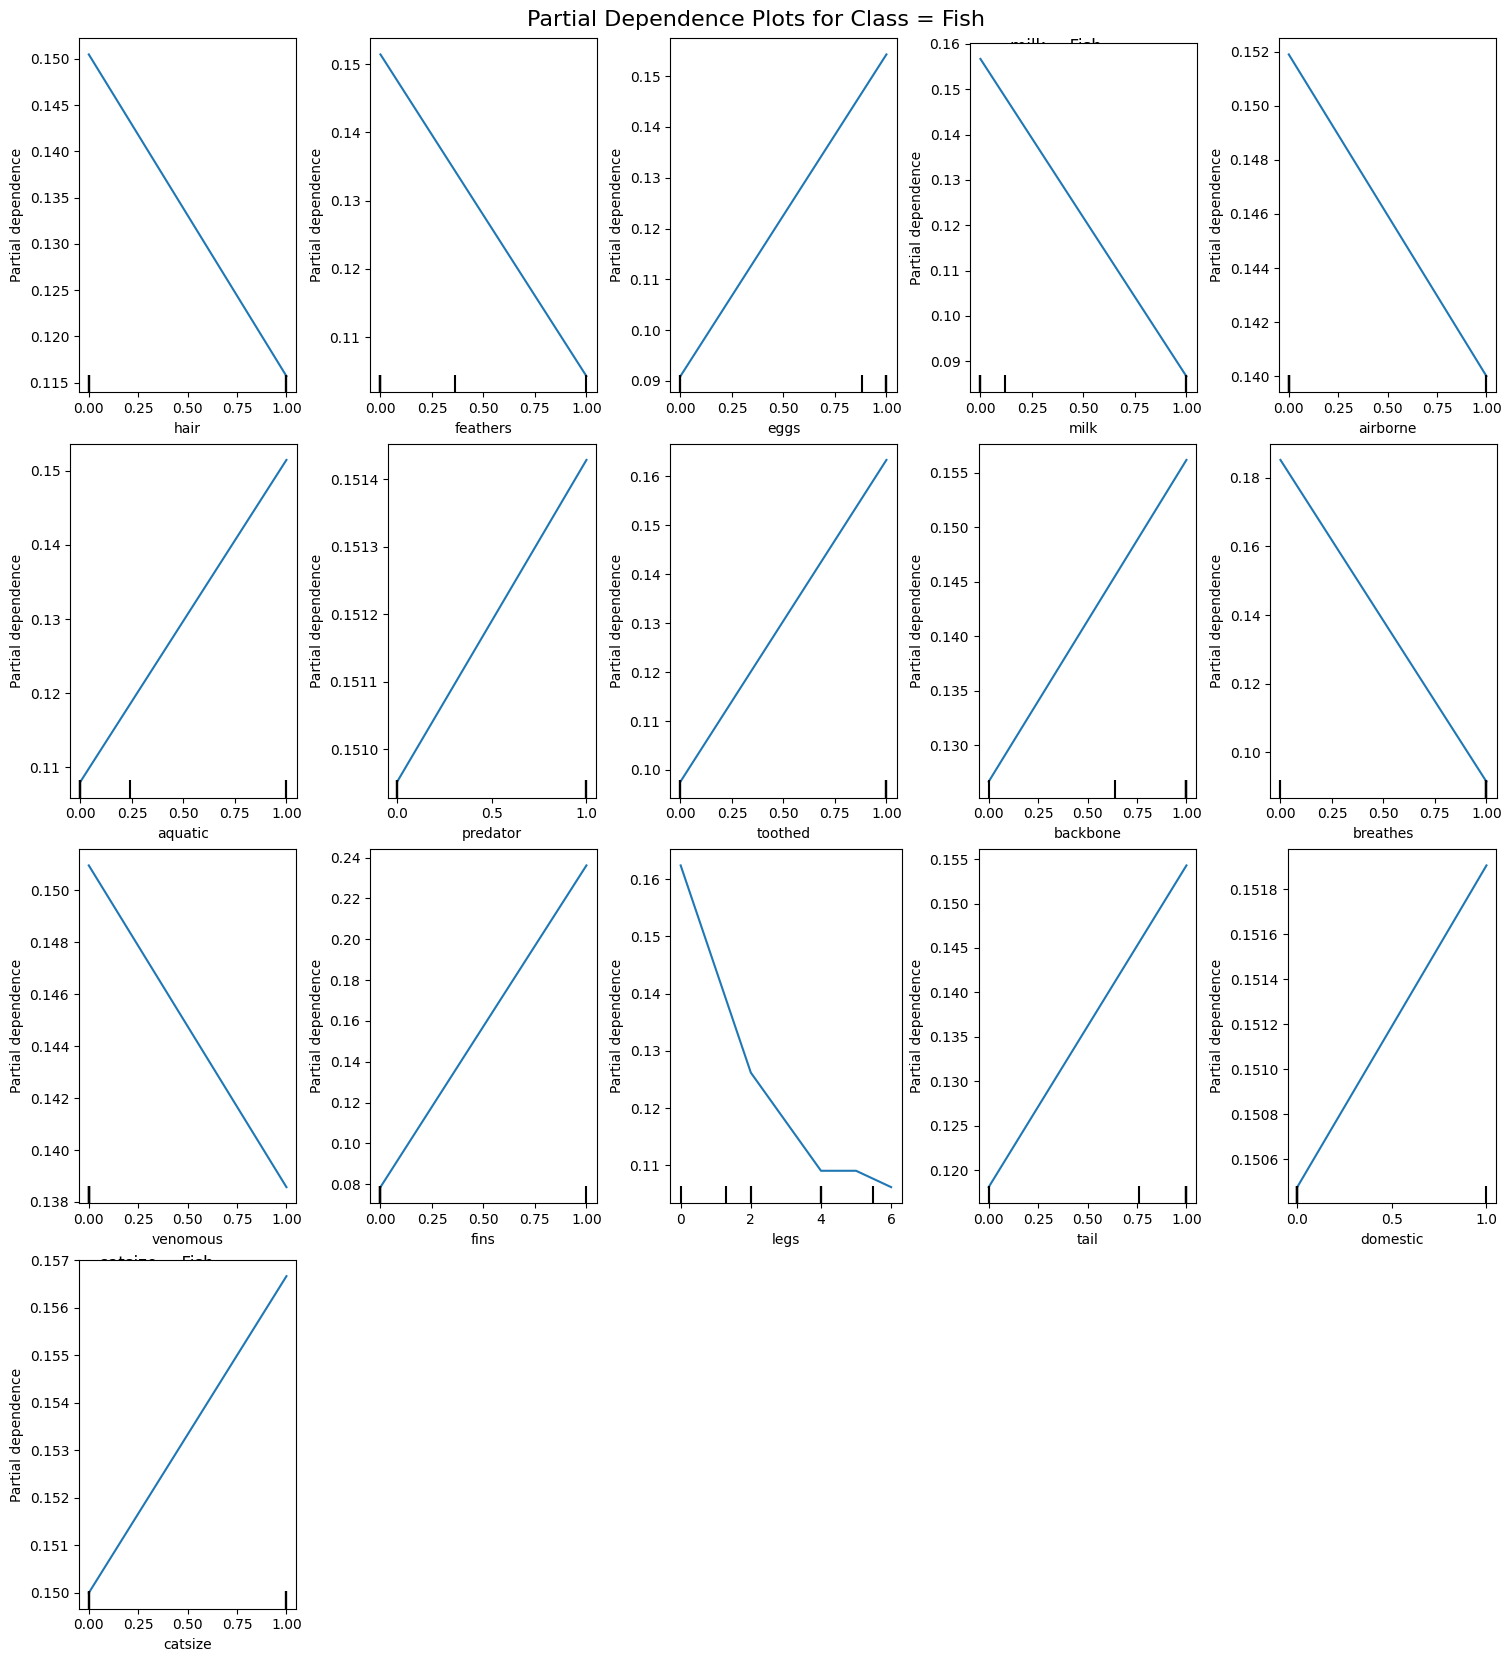

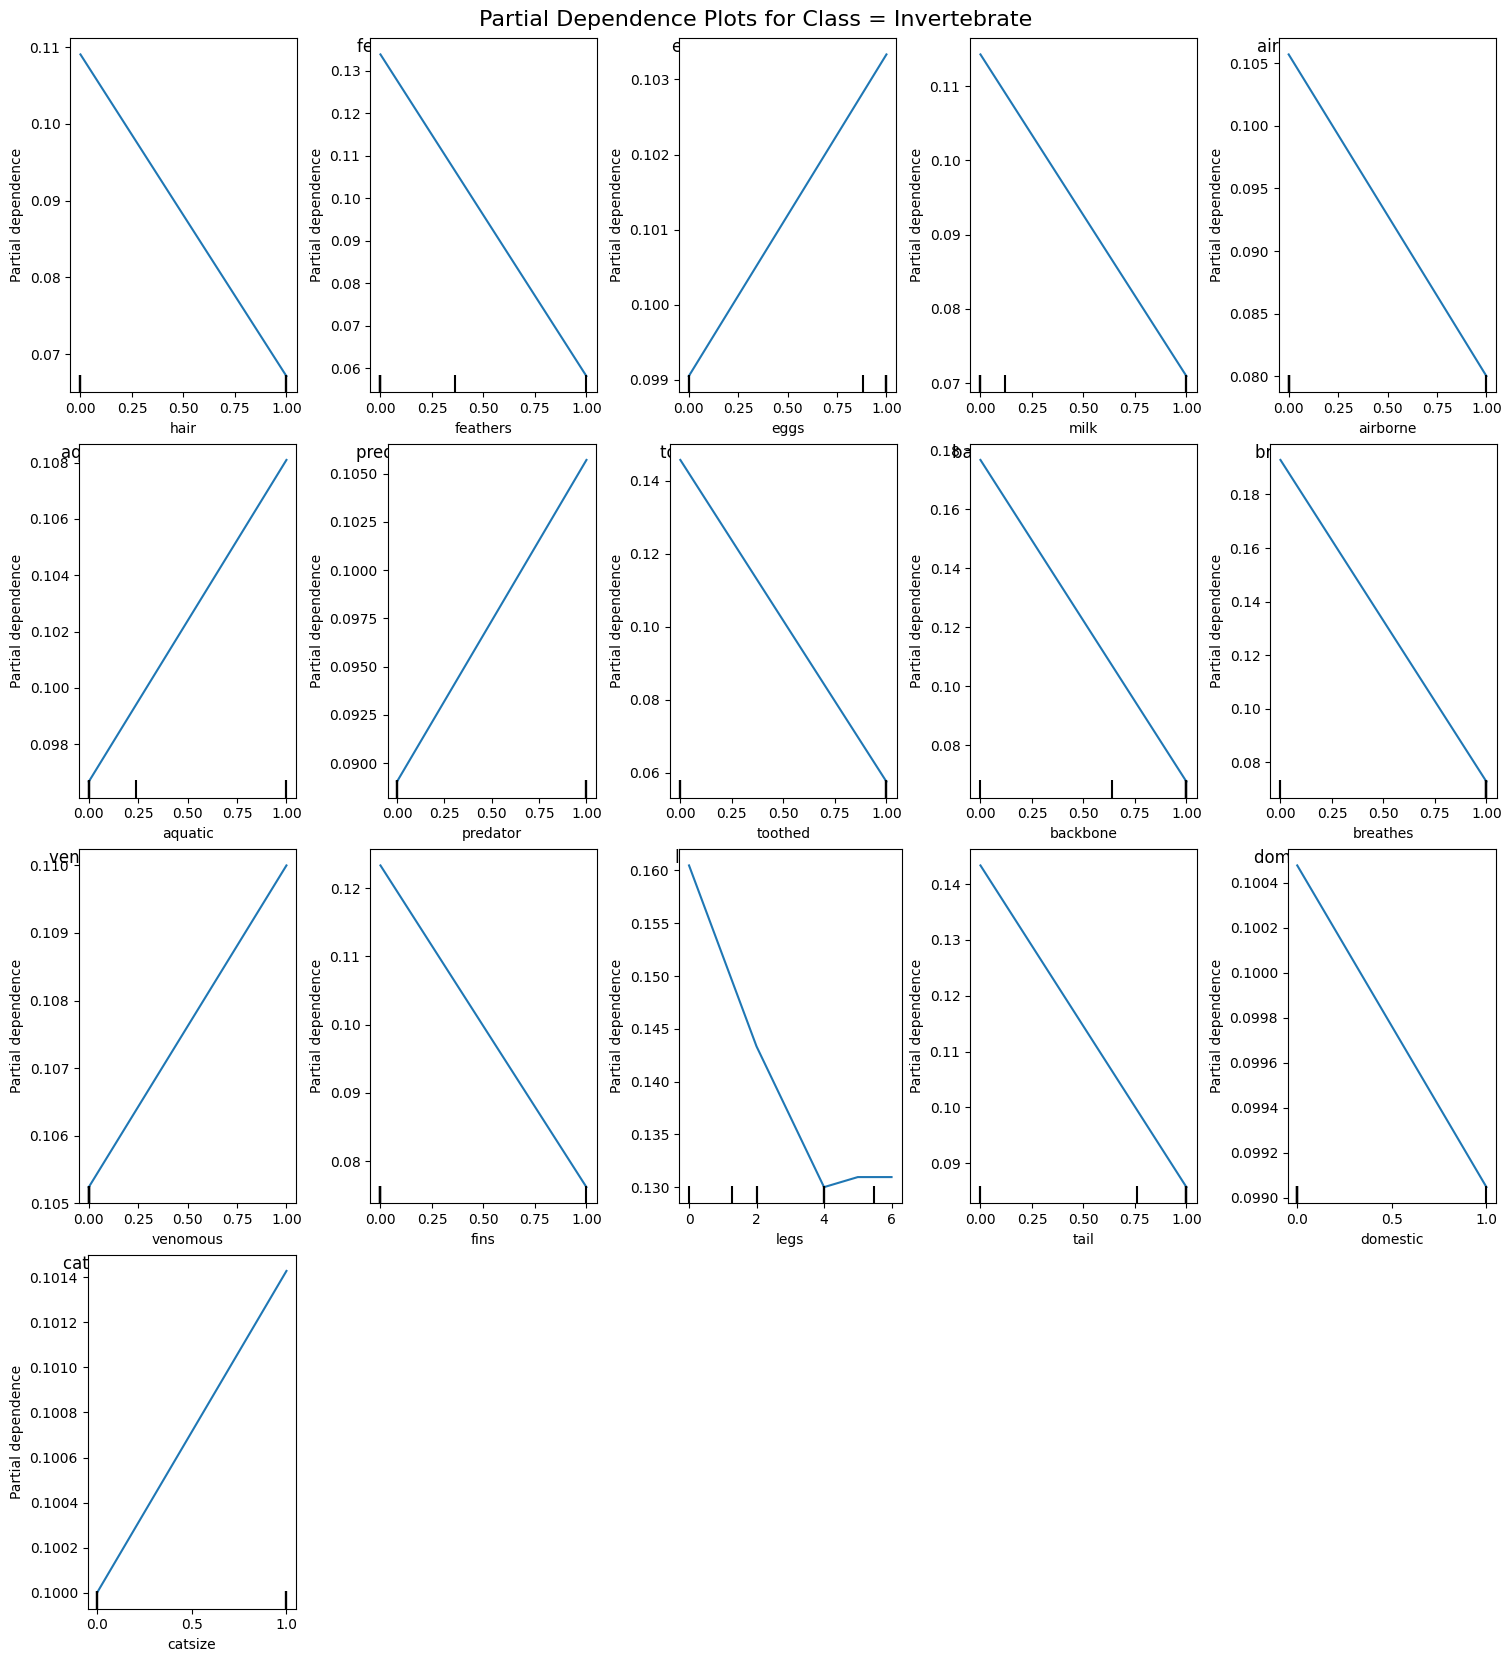

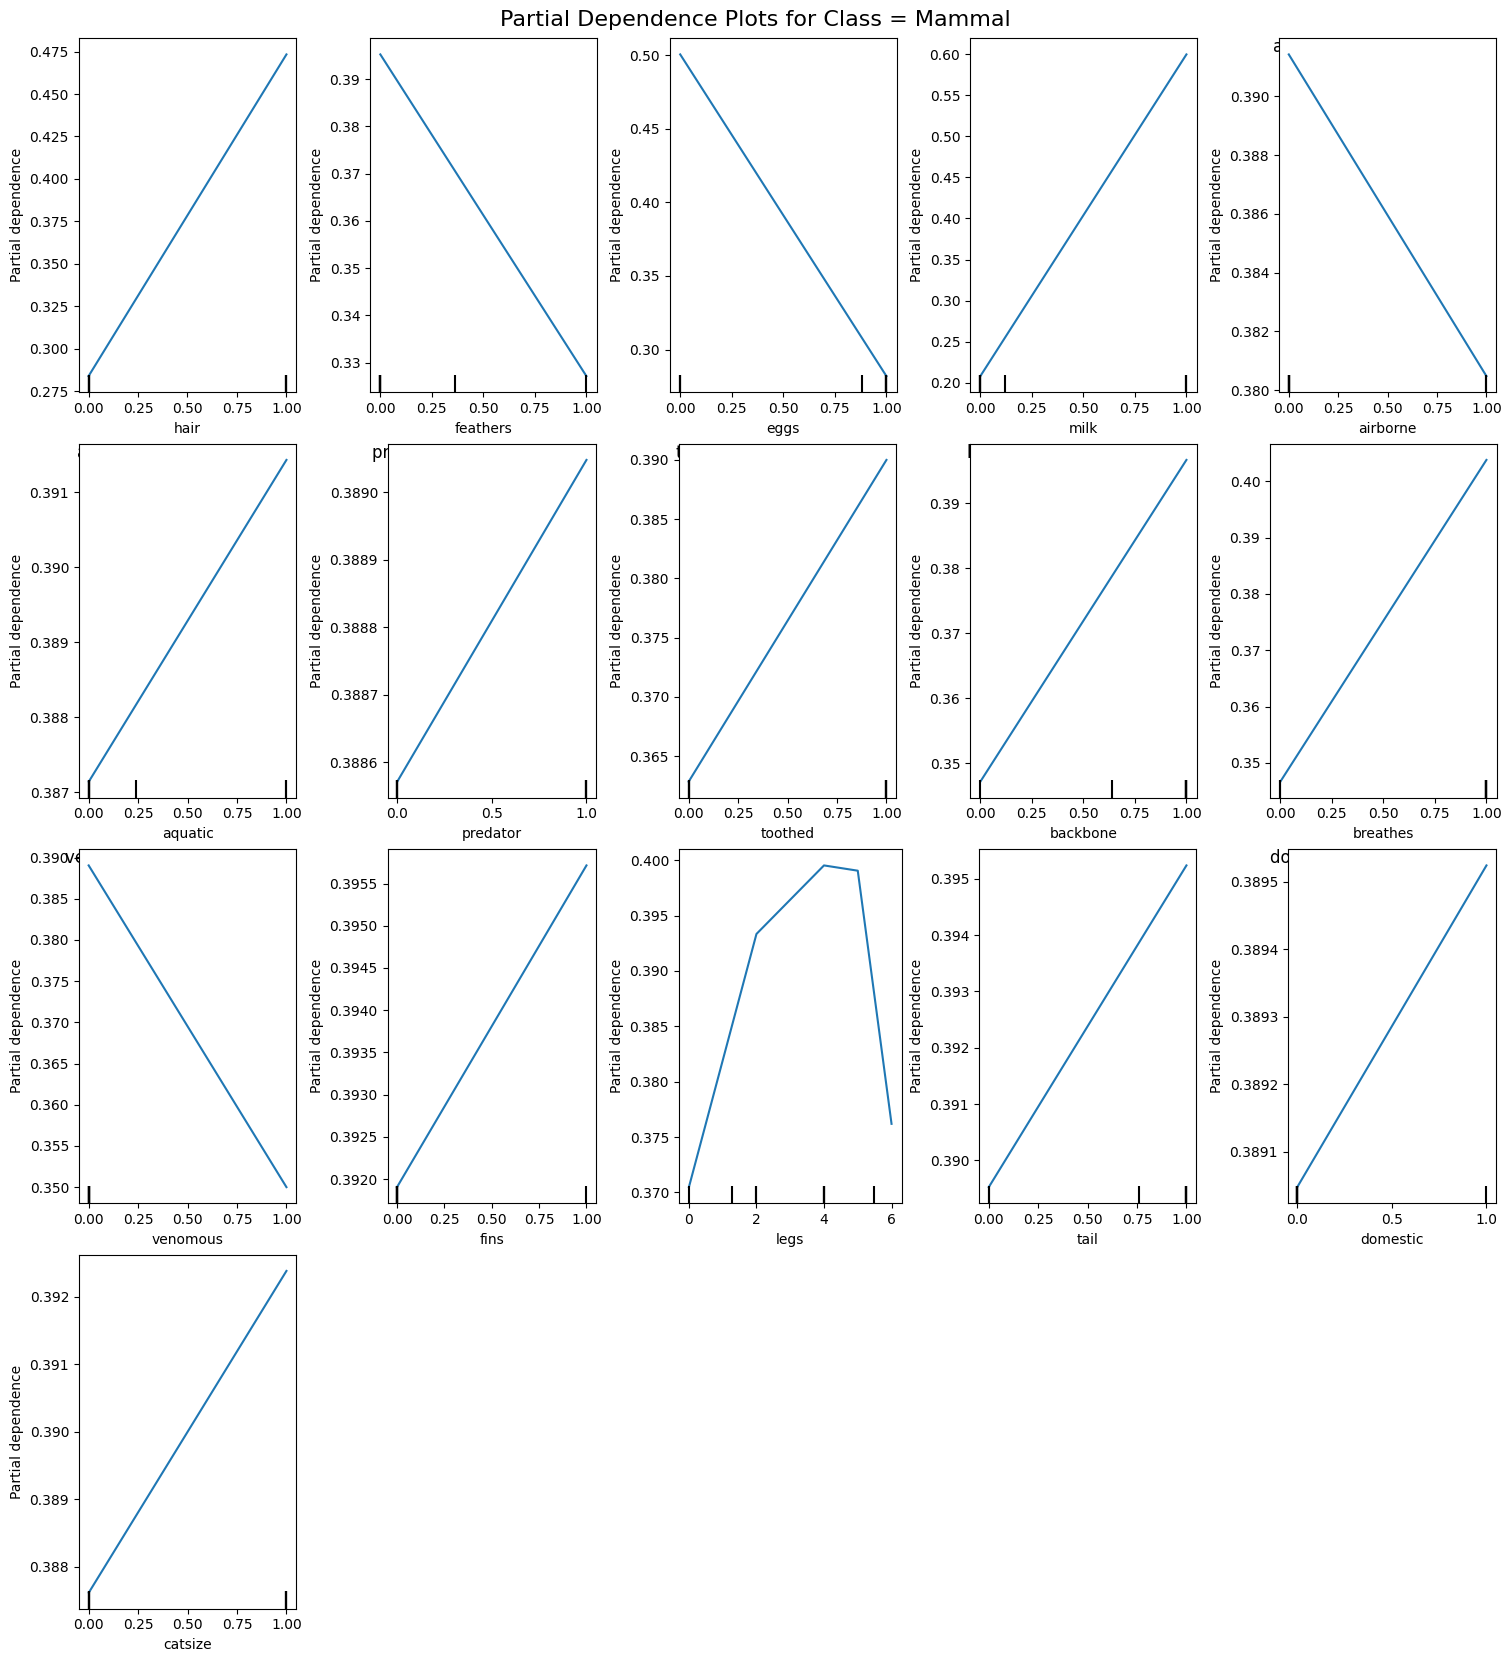

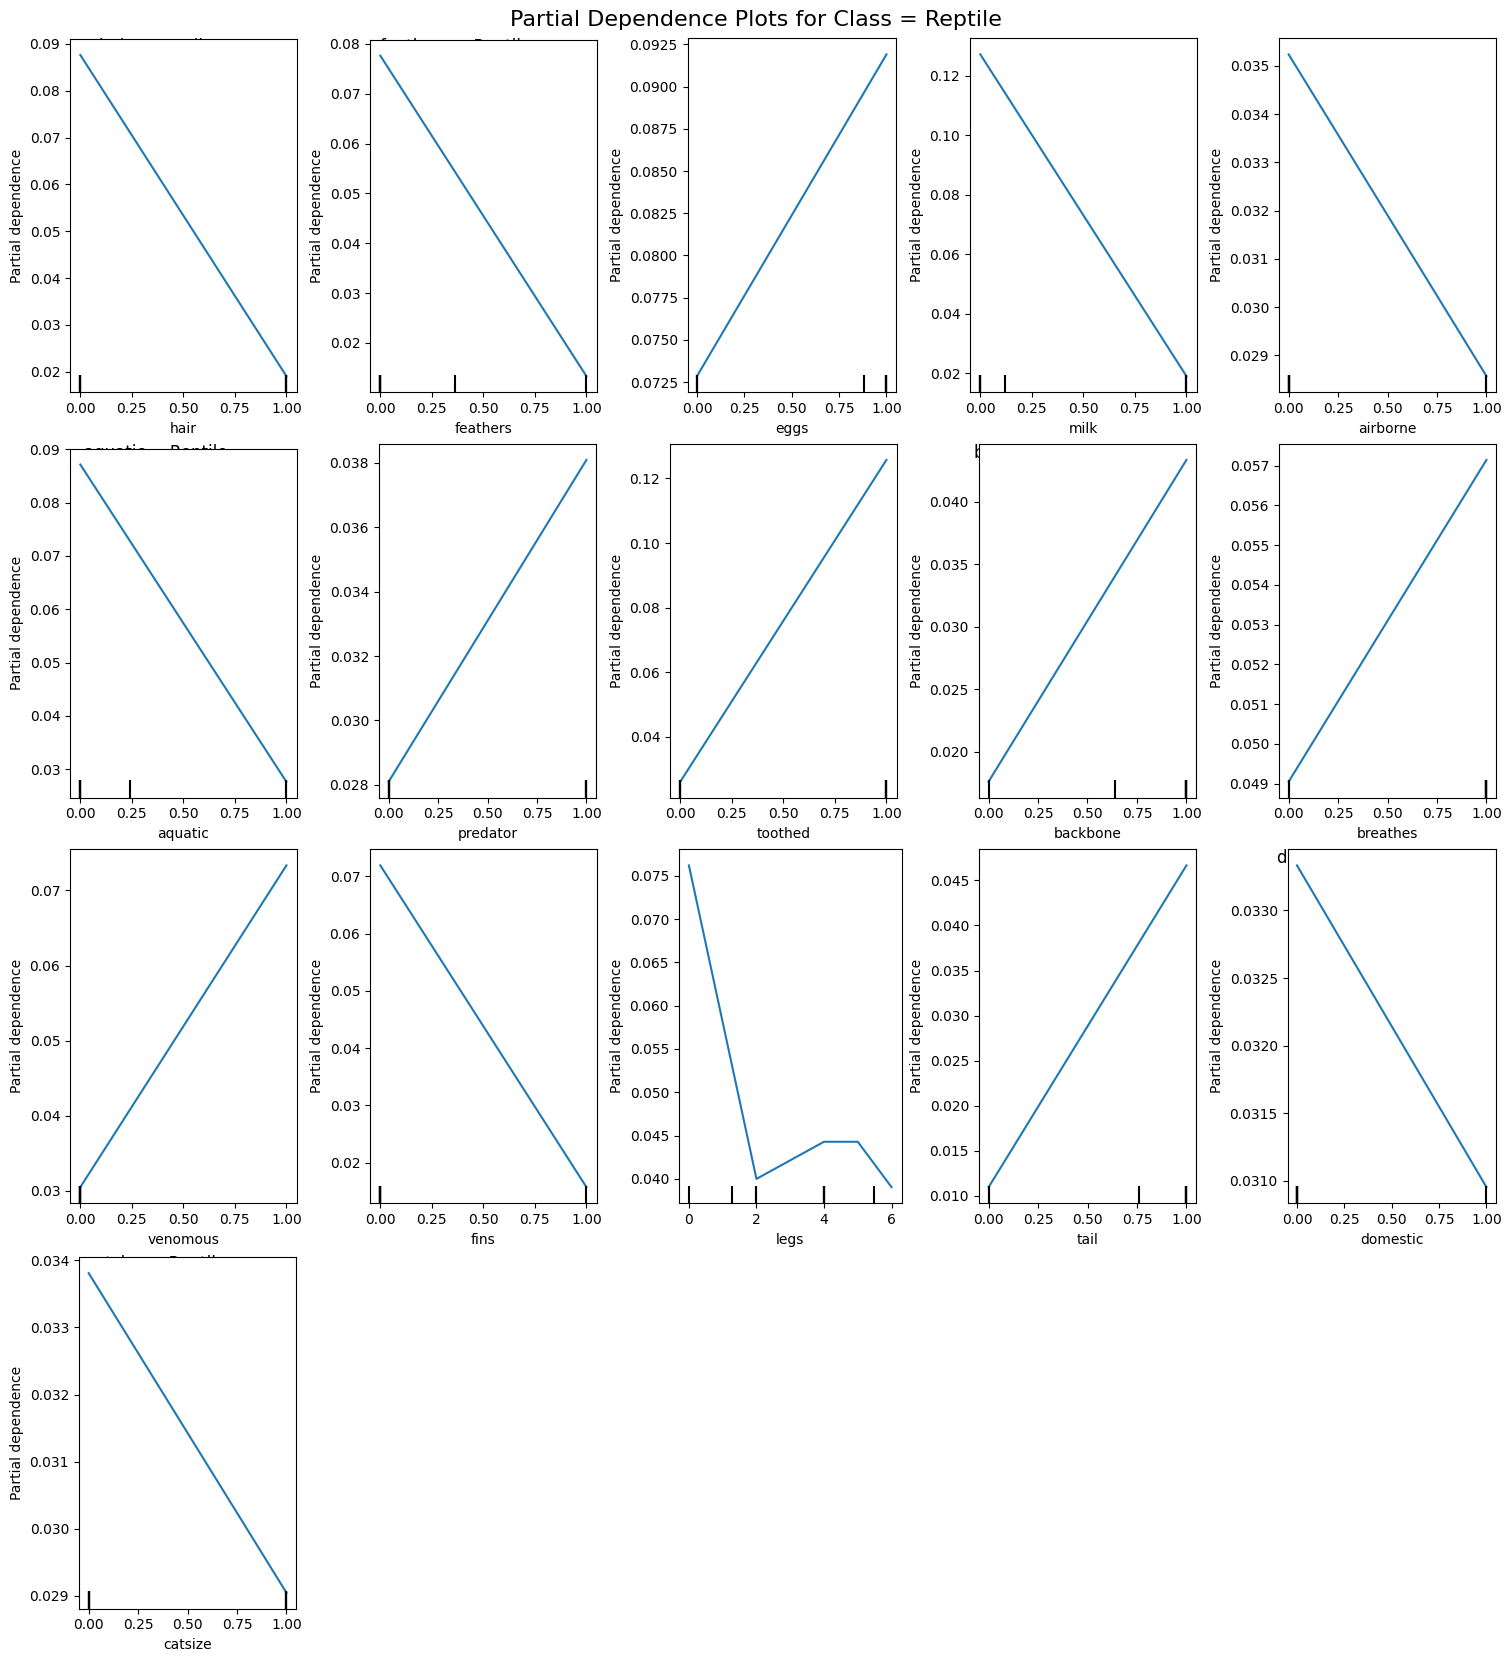

In [18]:
feature_names = X.columns.tolist() # Get all features
class_labels = model.classes_ # Get all target classes

# Create PDP plots for each feature against each class
for target_class in class_labels:
    fig, axes = plt.subplots(nrows=int(len(feature_names) / 3) + 1, ncols=5, figsize=(15, len(feature_names) * 1.5), constrained_layout=True)
    axes = axes.flatten()

    for i, feature in enumerate(feature_names):
        PartialDependenceDisplay.from_estimator(model, X_test, [feature], kind="average", target=target_class, ax=axes[i]) # Create PDP plot
        axes[i].set_title(f"{feature} → {target_class}")

    for j in range(len(feature_names), len(axes)): # Hide unused axes (if number of features not multiple of 3)
        fig.delaxes(axes[j])

    fig.suptitle(f"Partial Dependence Plots for Class = {target_class}", fontsize=16)
    plt.show()


Based on these PDP plots, there are several strong correlations between the features and classes in the dataset. There is a clear inverse relationship between hair and feathers which makes logical sense: animals that have hair don't have feathers and animals with feathers don't have hair. The same inverse relationship exists between producing milk and laying eggs. The plots also show positive correlations between features, like animals that are predators typically also have teeth.

These relationships between features helps the model better separate the classes. For example, if the animal has hair and produces milk, it is very likely to be a mammal. However, this can also be a concern if the model assigns too much weight to these features and not the others which could reduce the importance of other potentially important discriminative features.

### **ICE Plot**

*analysis of plots*

### **ALE Plot**

*analysis of plots*

### **Analysis**

*discussion of findings*